In [0]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [21]:
cd /content/drive/My\ Drive/Colab\ Notebooks/matrix_transformacja

/content/drive/My Drive/Colab Notebooks/matrix_transformacja


In [23]:
ls data

shoe_prices.csv


In [0]:
df = pd.read_csv("data/shoe_prices_filtered.csv", low_memory=False)

In [29]:
df.shape[0]

18342

In [0]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [27]:
mean_price = np.mean( df['prices_amountmin'] )
mean_price

96.24863482716663

In [0]:
y_mean = [ mean_price ] * df.shape[0]
y_true = df['prices_amountmin']

In [45]:
mean_absolute_error(y_true, y_mean)

67.46755350850002

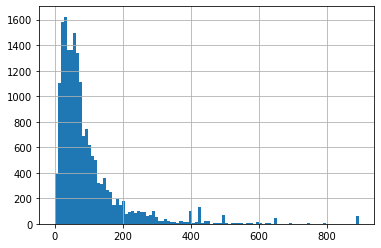

In [39]:
df['prices_amountmin'].hist(bins=100)

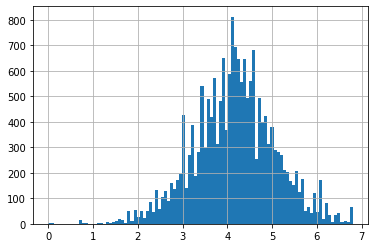

In [40]:
np.log1p( df.prices_amountmin ).hist(bins=100)

In [44]:
y_med = [ np.median(df['prices_amountmin']) ] * df.shape[0]
y_true = df['prices_amountmin']
mean_absolute_error(y_true, y_med)

60.62082978955403

In [0]:
y_true = df['prices_amountmin']
price_log_mean = [ np.expm1(np.mean(np.log1p(y_true))) ] * y_true.shape[0]

In [55]:
mean_absolute_error(y_true=y_true, y_pred=price_log_mean)

60.63914228110542

In [0]:
df['brand_factor'] = df.brand.factorize()[0]
df['manufacturer_factor'] = df.manufacturer.factorize()[0]

In [57]:
df.brand_factor.value_counts

<bound method IndexOpsMixin.value_counts of 0           0
1           0
2           1
3           1
4           1
         ... 
18337    1855
18338     307
18339     411
18340     411
18341     411
Name: brand_factor, Length: 18342, dtype: int64>

In [0]:
def run_model(features):
  X = df[ features ].values
  y = df.prices_amountmin.values

  model = DecisionTreeRegressor(max_depth=5)
  scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
  return np.mean(scores), np.std(scores)

In [71]:
features = ['brand_factor', 'manufacturer_factor']
run_model(features)

(-59.74945987811776, 5.944944292685739)

In [72]:
features = ['manufacturer_factor']
run_model(features)

(-67.13899470956127, 5.757914408838504)

In [73]:
features = ['brand_factor']
run_model(features)

(-59.66740722193515, 5.86318651440948)